### 1a. Preprocessing for malay bilingual dataset and analysis

In [45]:
# libraries
from __future__ import print_function
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re

In [46]:
# load data
df = pd.read_csv('../datasets/mly1970-sarc(raw).csv', encoding="utf-8")
df.shape

(1970, 2)

In [47]:
# convert data to lowercase, split
df.columns = ['comment_mly','sarc_majority']
df['comment_mly'] = df['comment_mly'].str.lower().str.split()

In [48]:
# length of each data
df['length'] = df['comment_mly'].map(lambda text: len(text))
df.head()

,comment_mly,sarc_majority,length
0,"[rakyat, akan, tanggung, lebih, banyak, la, na...",sarc,7
1,"[dah, ko, metedarah, duit, rakyat, ,, nak, bua...",non-sarc,60
2,"[tutup, tv, n, radio...., jgn, dngar, janji, b...",sarc,12
3,"[ya, lah, ko, dah, dera, rakyat.., bajet, besa...",non-sarc,15
4,"[oiii...kerjaan, bn..ko, org, sdr, x, .?, dh, ...",non-sarc,45


In [49]:
# apply stopwords
from nltk.corpus import stopwords

stop = stopwords.words('stoplist.engmalay(combine).txt')
df['comment_mly'] = df['comment_mly'].apply(lambda x: [item for item in x if item not in stop])
df['sarc_majority'] = df['sarc_majority']

In [50]:
# length of each data after stopword
df['length'] = df['comment_mly'].map(lambda text: len(text))
df.head()

,comment_mly,sarc_majority,length
0,"[rakyat, tanggung, lebih, la]",sarc,4
1,"[dah, ko, metedarah, duit, rakyat, ,, nak, bel...",non-sarc,48
2,"[tutup, tv, n, radio...., jgn, dngar, janji, b...",sarc,12
3,"[ya, lah, ko, dah, dera, rakyat.., bajet, besa...",non-sarc,14
4,"[oiii...kerjaan, bn..ko, org, sdr, x, .?, dh, ...",non-sarc,41


In [51]:
df.dtypes

comment_mly      object
sarc_majority    object
length            int64
dtype: object

In [52]:
len (df)

1970

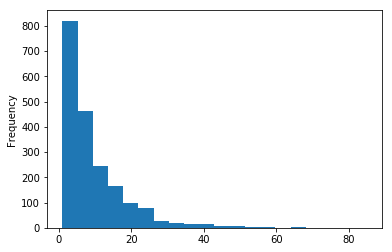

In [53]:
# plot histogram for length data frequency
df.length.plot(bins=20, kind='hist')

In [54]:
df.length.describe()

count    1970.000000
mean        9.494924
std         9.264809
min         1.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        85.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027172878780>,
      dtype=object)

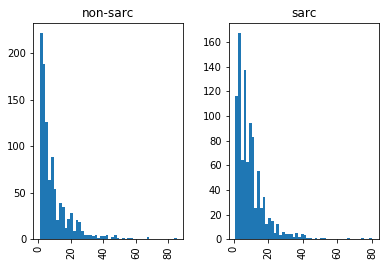

In [55]:
# plot histogram for length data frequency by type
df.hist(column='length', by='sarc_majority', bins=50)

In [56]:
# re-read data
sentiment = pd.read_csv('../datasets/mly1970-sarc(raw).csv')
sentiment.shape

(1970, 2)

In [57]:
sentiment.head()

,comment,sarc_majority
0,Rakyat akan tanggung lebih banyak la nampaknya,sarc
1,"Dah ko metedarah duit Rakyat , nak buat belanj...",non-sarc
2,Tutup tv n radio.... Jgn dngar janji bajet 201...,sarc
3,Ya lah Ko dah dera Rakyat.. Bajet besar untuk ...,non-sarc
4,Oiii...kerjaan bn..ko org sdr x .? Dh lh keraj...,non-sarc


In [58]:
sentiment.head()

,comment,sarc_majority
0,Rakyat akan tanggung lebih banyak la nampaknya,sarc
1,"Dah ko metedarah duit Rakyat , nak buat belanj...",non-sarc
2,Tutup tv n radio.... Jgn dngar janji bajet 201...,sarc
3,Ya lah Ko dah dera Rakyat.. Bajet besar untuk ...,non-sarc
4,Oiii...kerjaan bn..ko org sdr x .? Dh lh keraj...,non-sarc


In [59]:
sentiment.describe()

,comment,sarc_majority
count,1970,1970
unique,1956,2
top,Alhamdulillah,non-sarc
freq,4,1001


In [60]:
# data cleaning
# remove special character
sentiment.comment = sentiment.comment.apply(lambda s: re.sub("<[^<]+?>", "", s))

# remove multiple spaces
sentiment.comment = sentiment.comment.apply(lambda s: re.sub(' +', ' ', s))

# remove leading and trailing spaces
sentiment.comment = sentiment.comment.apply(lambda t: t.strip())
sentiment.comment = sentiment.comment.apply(lambda s: s.strip())

# lowercase all string
sentiment.comment = sentiment.comment.str.lower()

In [61]:
sentiment.comment.to_csv('../datasets/mly1970-sarc-post_stop.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [62]:
# bag of word
comment_word_bag = sentiment.comment.apply(lambda t: t + " ").sum()

In [63]:
# count bag of word
from collections import Counter
Counter(comment_word_bag.split()).most_common()[:100]

[('yg', 335),
 ('rakyat', 248),
 ('maju', 230),
 ('la', 222),
 ('ni', 192),
 ('najib', 165),
 ('ekonomi', 144),
 ('tak', 142),
 ('x', 129),
 ('dia', 123),
 ('negara', 123),
 ('nak', 121),
 ('nk', 120),
 ('ko', 118),
 ('tu', 118),
 ('malaysia', 111),
 ('pun', 109),
 ('dan', 108),
 ('je', 106),
 ('pm', 103),
 ('duit', 99),
 ('gst', 96),
 ('apa', 93),
 ('ke', 91),
 ('org', 89),
 ('mcm', 89),
 ('semua', 87),
 ('gaji', 85),
 ('sabah', 82),
 ('naik', 81),
 ('dah', 79),
 ('dgn', 79),
 ('aku', 78),
 ('di', 78),
 ('ada', 77),
 ('kau', 76),
 ('kepala', 72),
 ('lah', 69),
 ('paling', 66),
 ('yang', 65),
 ('cukai', 64),
 ('bajet', 63),
 ('islam', 63),
 ('buat', 62),
 ('kita', 62),
 ('menteri', 61),
 ('kata', 61),
 ('utk', 59),
 ('mana', 58),
 ('lagi', 57),
 ('kerajaan', 56),
 ('kalau', 54),
 ('sarawak', 48),
 ('sendiri', 48),
 ('boleh', 47),
 ('dh', 45),
 ('dpt', 45),
 ('kena', 45),
 ('cari', 44),
 ('ini', 43),
 ('n', 42),
 ('lg', 41),
 ('kat', 41),
 ('makin', 41),
 ('untuk', 40),
 ('bg', 40),
 ('

In [64]:
# show most common
stopwords = [word for word in nltk.corpus.stopwords.words('malay.stoplist.txt')]
comment_word = [word for word in comment_word_bag.split() if word.lower() not in stopwords]
Counter(comment_word).most_common()[:100]

[('yg', 335),
 ('rakyat', 248),
 ('maju', 230),
 ('la', 222),
 ('ni', 192),
 ('najib', 165),
 ('ekonomi', 144),
 ('tak', 142),
 ('x', 129),
 ('dia', 123),
 ('negara', 123),
 ('nak', 121),
 ('nk', 120),
 ('ko', 118),
 ('tu', 118),
 ('malaysia', 111),
 ('je', 106),
 ('pm', 103),
 ('duit', 99),
 ('gst', 96),
 ('org', 89),
 ('mcm', 89),
 ('gaji', 85),
 ('sabah', 82),
 ('naik', 81),
 ('dah', 79),
 ('dgn', 79),
 ('aku', 78),
 ('ada', 77),
 ('kau', 76),
 ('kepala', 72),
 ('lah', 69),
 ('cukai', 64),
 ('bajet', 63),
 ('islam', 63),
 ('kita', 62),
 ('menteri', 61),
 ('kata', 61),
 ('utk', 59),
 ('kerajaan', 56),
 ('sarawak', 48),
 ('sendiri', 48),
 ('dh', 45),
 ('dpt', 45),
 ('kena', 45),
 ('cari', 44),
 ('ini', 43),
 ('n', 42),
 ('lg', 41),
 ('kat', 41),
 ('makin', 41),
 ('bg', 40),
 ('kan', 40),
 ('brim', 39),
 ('.', 39),
 ('hidup', 39),
 ('dana', 38),
 ('punya', 36),
 ('1', 34),
 ('ckp', 33),
 ('jgn', 32),
 ('d', 32),
 ('tapi', 32),
 ('lebih', 31),
 ('kami', 31),
 ('dlm', 31),
 ('bayar', 31)

In [65]:
# show less common
Counter(comment_word).most_common()[::-1]

[('sngaja', 1),
 ('pulak.....sori2', 1),
 ('t’lps', 1),
 ('t’carut', 1),
 ('mulot', 1),
 ('projek.....opssss', 1),
 ('rolling', 1),
 ('htg', 1),
 ('bangkrap', 1),
 ('heboh', 1),
 ('jumlahnya.', 1),
 ('pulak.tunjuklah', 1),
 (':)', 1),
 ('nasional.', 1),
 ('barisan', 1),
 ('fundamental', 1),
 ('tau...hihi', 1),
 ('bisinglaa...simen', 1),
 ('kot.....', 1),
 ('saje', 1),
 ('njib', 1),
 ('mati...', 1),
 ('dilahirkan', 1),
 ('tersurat', 1),
 ('bolehlah...mungkin', 1),
 ('negara...jual', 1),
 ('membangkang,', 1),
 ('kredibiliti...cuma', 1),
 ('ye...mereka', 1),
 ('usahlah', 1),
 ('malaysia...jadi', 1),
 ('keyakinan', 1),
 ('menunjukkan', 1),
 ('a,', 1),
 ('poors', 1),
 ("moody's", 1),
 ('fitch,', 1),
 ('penarafan', 1),
 ('lepas...tapi', 1),
 ('pembangkang,', 1),
 ('seri', 1),
 ('datuk', 1),
 ('bnm', 1),
 ('dinyatakan...', 1),
 ('us$100billion', 1),
 ('us$..reserve', 1),
 ('menurun', 1),
 ('angka', 1),
 ('sebelumnya..', 1),
 ('menyusut', 1),
 ('negera', 1),
 ('reserve', 1),
 ('alhamdullah.', 

In [66]:
# save output to